<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week12/w12_mon_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **07. 군집화**

## **04 SVD(Singular Value De omposition)**

### **SVD 개요**

PCA와 유사한 행렬 분해 기법 이용
- PCA: 정방행렬만을 고유벡터로 분해 가능
- SVD: 행과 열 크기 다른 행렬에도 적용 가능

**SVD**
- m x n 크기의 행렬 A를 다음과 같이 분해
  $$A=U∑V^T$$
- 특이값 분해로 불림
- **특이벡터(singular vector)**: U, V에 속한 벡터
  - 모든 특이벡터는 서로 직교하는 성질
- ∑: 대각행렬
  - **특이값**: ∑이 위치한 0이 아닌 값
- 차원
  - A: (m, n)
  - U: (m, m)
  - ∑: (m, n)
  - $V^T$: (n,n)

  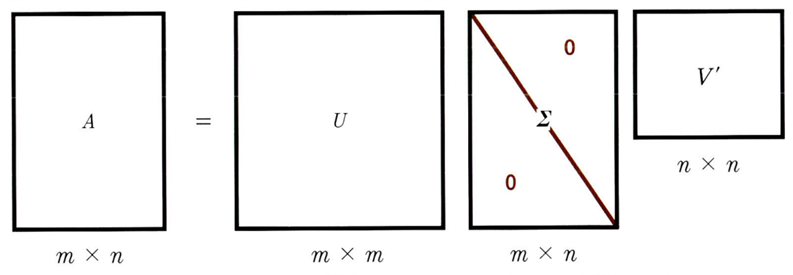

일반적으로는 ∑의 비대각인 부분과 대각원소 중 특이값이 0인 부분 & 대응되는 U와 V 원소도 함께 제거

=> 차원 줄인(컴팩트한) 형태로 SVD 적용
- 차원
  - A: (m, n)
  - U: (m, p)
  - ∑: (p, p)
  - $V^T$: (p,n)

  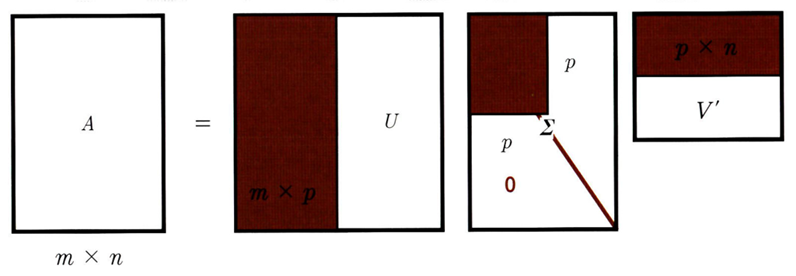

**Truncated SVD**

: ∑의 대각원소 중 상위 몇 개만 추출, 대응하는 U와 V 원소도 함꼐 제거해 더욱 차원 줄인 형태로 분해

일반적인 SVD는 넘파이/사이파이 라이브러리 이용해 수행

**넘파이의 SVD를 이용한 SVD 연산 수행, SVD 분해 살펴보기**
- 행렬의 개별 로우끼리의 의존성 없애기 위해 랜덤 행렬 생성

In [2]:
# 넘파이의 SVD 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


생성된 a 행렬에 SVD 적용해 U, Sigma, Vt 도출하기
- `numpy.linalg.svd`에 파라미터로 원본 행렬 입력

  -> U 행렬, Sigma 행렬, V 전치 행렬 반환
  - Sigma = ∑행렬: 대각에 위치한 값만 0이 아니고 나머지는 모두 0 => 0이 아닌 경우만 1차원 행렬로 표현

In [3]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


분해된 행렬들을 이용해 원본 행렬로 정확히 복원되는지 확인하기
- U, Sigma, Vt를 내적해서 복원
  - Sigma는 1차원으로 추출했으므로 0을 포함한 대칭행렬로 변환한 뒤에 내적 수행

In [4]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


동일하게 복원됨을 확인

**로우 간 의존성이 있는 경우**
- 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지
- 의존성 부여하기 위한 a 행렬 설정
  - row 3 = row 1 + row 2
  - row 4 = row 1


In [5]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [6]:
# 다시 SVD 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


Sigma 값 중 2개가 0으로 변함됨
- 선형 독립인 로우 벡터 개수가 2개 (= 행렬의 Rank)

원본 행렬 복원하기
- U, Sigma, Vt 전체 데이터 이용 X
- Sigma의 0에 대응되는 U, Sigma, Vt의 데이터 제외하고 복원 (Sigma의 앞의 2개 요소만 0이 아님)
  - U 행렬 중 선행 두 개의 열
  - Vt의 선행 두 개의 행

In [7]:
# U 행렬의 경우 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_,3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


**Truncated SVD를 이용한 행렬 분해**

: ∑ 행렬에 있는 대각원소=특이값 중 상위 일부 데이터만 추출해 분해
- 인위적으로 더 작은 차원의 U, ∑, $V^T$로 분해하므로 원본 행렬을 정확하게 다시 복원할 수는 X
- 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬 근사 가능
- 원래 차원 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원 가능

사이파이 모듈
- Truncated SVD는 사이파이에서만 지원 (넘파이 X)
- SVD: `scipy.linalg.svd` 이용
- Truncated SVD: 희소 행렬로만 지원됨 => `scipy.sparse.linalg.svds`

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬 출력
## SVD 적용할 경우 U, Sigma, Vt 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr) # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

6x6 행렬을 SVD 분해하면 U, Sigma, Vt가 각각 (6,6), (6,), (6, 6)이지만

Truncated SVD의 n_components=4로 설정해 (6, 4), (4,), (4, 6)로 분해됨
- 완벽하게 복원되지 않고 근사적으로 복원됨

### **사이킷런 TruncatedSVD 클래스를 이용한 변환**

사이킷런 `TruncatedSVD` 클래스
- 사이파이의 `svds`와 같이 원본 행렬을 분해한 U, Sigma, Vt 행렬 반환하지는 X
- `PCA` 클래스와 유사하게 `fit()`, `transform()` 호출 -> 원본 데이터를 몇 개의 주요 컴포넌트(=Truncated SVd의 K 컴포넌트 수)로 차원 축소해 변환
- 원본 데이터를 Truncated SVD 방식으로 분해된 U*Sigma 행렬에 선형 변환해 생성

Text(0, 0.5, 'TruncatedSVD Component 2')

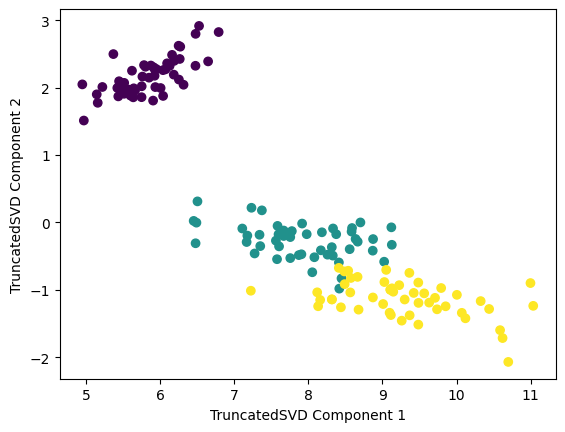

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD 변환된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

변환 후 어느정도 품종별 클러스터링이 가능할 정도로 각 변환 속성이 뛰어난 고유성을 가짐

사이킷런의 TruncatedSVD와 PCA 클래스 구현
- 두 클래스 모두 SVD를 이용해 행렬 분해
- 붓꽃 데이터를 스케일링으로 변환한 뒤 TruncatedSVD, PCA 변환해보면 두 개가 거의 동일함

Text(0.5, 1.0, 'PCA Transformed')

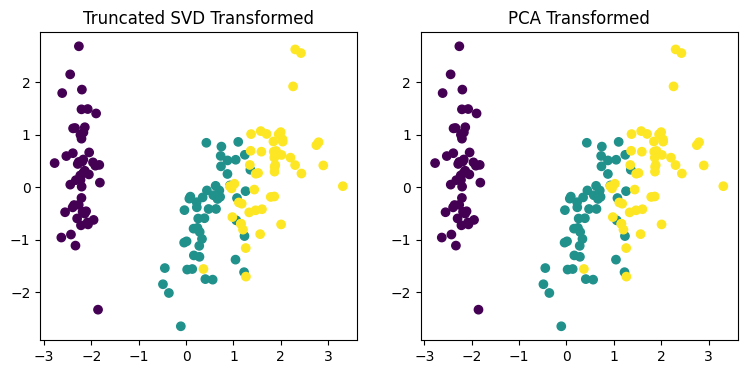

In [12]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪾에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [13]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_-tsvd.components_).mean())

2.3364990497931616e-15
2.0816681711721685e-17


두 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 실제로 비교해보면 거의 동일함
- 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 SVD와 PCA가 동일한 변환을 수행함

  = PCA가 SVD 알고리즘으로 구현됨
  - PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능, SVD는 희소 행렬(Sparse Matrix)에 대한 변환도 가능

SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식, 신호 처리 분야에 사용됨

텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘

## **05 NMF(Non-Negative Matrix Factorization)**

### **NMF 개요**

Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형

모든 원소 값이 양수(0 이상)인 게 보장되면 다음과 같이 두 개의 기반 양수 행렬로 분해되는 기법

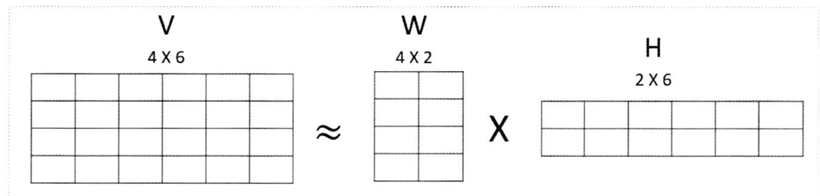

4x6 원본 행렬(V)은 4x2 행렬(W)와 2x6 행렬(H)로 근사해 분해
- 행렬 분해(Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭
- 길고 가는 행렬 W(원본 행렬의 행 크기와 같고 열 크기보다 작은 행렬)와 작고 넓은 행렬H(원본 행렬의 행 크기보다 작고 열 크기와 같은 행렬)로 분해
- 분해된 행렬은 잠재 요소를 특성으로 가짐
  - 분해 행렬 W: 원본 행에 대해서 잠재 요소의 값이 얼마나 되는지
  - 분해 행렬 H: 잠재 요소가 원본 열(원본 속성)로 어떻게 구성됐는지

- 사이킷런의 `NMF` 클래스로 지원

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

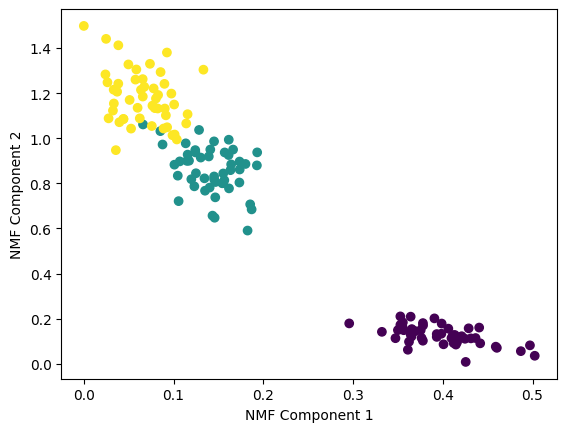

In [14]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트 토픽 도출 등의 영역에서 사용
- 이미지 압축을 통한 패턴 인식
- 텍스트의 토픽 모델링 기법
- 문서 유사도 및 클러스터링
- 추천(Recommendations) 영역 -- 영화 추천 등
  - 잠재 요소(Latent Factoring) 기반의 추천 방식
    
    사용자의 상품(e.g. 영화) 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해
    
    -> 사용자가 평가하지 않은 상품에 대한 잠재적인 요소 추출 -> 평가 순위(Rating) 예측
    
    => 높은 순위로 예측된 상품 추천